<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Clustering/K-Means/01_KMeans_Clustering_project_to_target_the_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

# DataPreprocessing

In [4]:
df = pd.read_csv('https://bit.ly/2FToHMJ')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**now we are choosing 2 columns only for better visualisation**

In [190]:
X = df.iloc[:, [3, 4]].values
X[:2]

array([[15, 39],
       [15, 81]])

# choosing optimal number of clusters in dataset
**by minimizing the WCSS (within-cluster sums of squares) and after apply elbow method and chose the no. of cluster where the decrease in WCSS is very less as compare to previous WCSS**

In [0]:
def optimal_clusters(X, step_size = 1, slope_threshold = 0.4 , end_point = 10):
  import numpy as np
  wcss = []
  #choose the step size for n_clusters
  Range = range(1, end_point, step_size)
  for i in Range:
    model = KMeans(n_clusters = i, init = 'k-means++', n_init = 10)
    #fit the model
    model.fit(X)

    #calculate wcss
    wcss_this_cluster = model.inertia_
    wcss.append(wcss_this_cluster)

  #select optimal number of clusters
  for i in range(len(wcss) - 1):
    #calculate slope of line
    slope = ((wcss[i] - wcss[i + 1])/step_size)/np.mean(wcss)
    if slope > slope_threshold:
      optimal_clusters, wcss_optimal = Range[i + 1], wcss[i+1]

  plt.figure(figsize = (10, 5))
  plt.plot(Range, wcss, c = 'r')
  plt.scatter(optimal_clusters, wcss_optimal, c = 'orange', s = 200, edgecolors = 'black')
  plt.annotate('optimal number of clusters',(optimal_clusters, wcss_optimal + 2 * min(wcss)))
  plt.title('WCSS vs. no. of clusters')
  plt.xlabel('No. of cluseters')
  plt.ylabel('WCSS')
  plt.xticks(Range, rotation = -20)
  #plt.grid()
  plt.show()
  return optimal_clusters, wcss_optimal

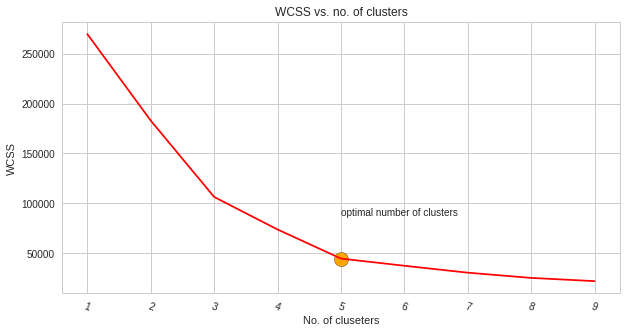

In [181]:
optimal_clusters, wcss_optimal = optimal_clusters(X, slope_threshold = 0.3)

**by elbow method we can see that optimal number of clusters are 5 because after this their is less decrease in WCSS**

# Run model on optimal number of clusters

In [170]:
model = KMeans(n_clusters = optimal_clusters, n_init = 10)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## predict the cluster's of every Features

In [171]:
y_label = model.fit_predict(X)
y_label

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

### Unique clusters

In [172]:
pd.Series(y_label).unique()

array([0, 3, 4, 1, 2])

## Visualise

In [173]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

In [0]:
import seaborn as sns

In [0]:
sns.set_style('whitegrid')

In [0]:
def visualise_2d_dataset(model = None, x = None, optimal_clusters = None):
  if not model:
    if not optimal_clusters:
      raise ValueError('Please Provide the number of optimal Clusters')
    else:
      model = KMeans(n_clusters = optimal_clusters, n_init = 10)
      model.fit(x)
  if model:
      y_label = model.fit_predict(x)
      plt.figure(figsize = (10, 7))
      plt.scatter(X[:, 0], X[:, 1], c = y_label, cmap = 'coolwarm', edgecolors = 'black', linewidths = 1, alpha = 1, s = 150)
      plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 300, c = 'red', label = 'Centroids', edgecolors = 'black', alpha = .7)
      plt.title(f'Visualisation of {optimal_clusters} clusters')
      plt.xlabel('Annual Income (k$)',fontsize =  'large')
      plt.ylabel('Spending Score (1 - 100)',fontsize =  'large')
      plt.legend(bbox_to_anchor = (1.2, 1))
      plt.show()

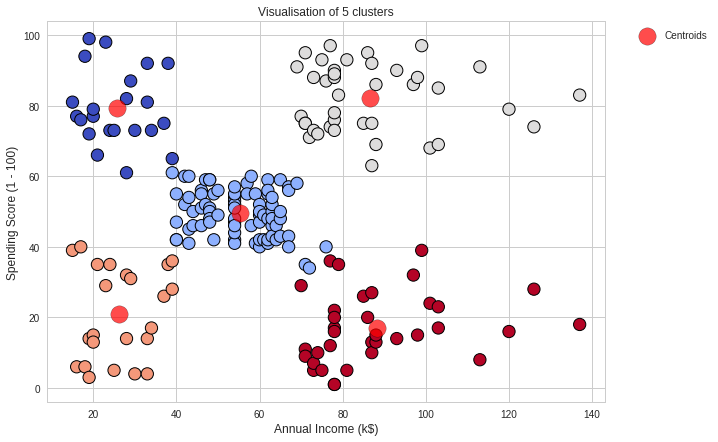

In [211]:
visualise_2d_dataset(optimal_clusters = 5, x = X)

# Conclustion of Project

**By visualising this graph we can conclude that is**
- cluster 1 (**lower left**) having **Low Income, Low Spending**                  ------->**Sensible Customers**
-  cluster 2 (**lower right**) having **High Income, Low Spending**  ------>**Careful Customers**
-  cluster 3 (**Center**) having **Medium Income, Medium Spending**------>**Standard Customers**
-  cluster4 (**Upper Left**) having **Low income, High Spending**             ------>**Carless Customers**
-  
cluster 5 (**Upper Right**) having **High Income, High Spending**------>**Target Customers**